In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
ipl = pd.read_excel("/Users/hrutheekreddy/Desktop/IPL batsman's.xlsx")
ipl.head()

,Player,Teams,year,Mat,Runs,HS,Price
0,V Kohli,RCB,2008,13,165,38,INR 0.1 Cr
1,V Kohli,RCB,2009,16,264,50,INR 0.1 Cr
2,V Kohli,RCB,2010,16,307,58,INR 0.1 Cr
3,V Kohli,RCB,2011,16,557,71,INR 0.8 Cr
4,V Kohli,RCB,2012,16,364,73,INR 0.8 Cr


In [37]:
print(ipl)

        Player Teams  year  Mat  Runs  HS       Price
0     V Kohli    RCB  2008   13   165  38  INR 0.1 Cr
1     V Kohli    RCB  2009   16   264  50  INR 0.1 Cr
2     V Kohli    RCB  2010   16   307  58  INR 0.1 Cr
3     V Kohli    RCB  2011   16   557  71  INR 0.8 Cr
4     V Kohli    RCB  2012   16   364  73  INR 0.8 Cr
..         ...   ...   ...  ...   ...  ..         ...
195  KL Rahul    RCB  2018   14   659  95     INR 1Cr
196  KL Rahul    RCB  2016   14   397  68     INR 1Cr
197  KL Rahul    SRH  2015    9   142  44     INR 1Cr
198  KL Rahul    SRH  2014   11   166  46     INR 1Cr
199  KL Rahul    RCB  2013    5    20  12  INR 0.1 Cr

[200 rows x 7 columns]


In [38]:
print(ipl.describe())

              year         Mat        Runs          HS
count   200.000000  200.000000  200.000000  200.000000
mean   2015.405000   13.760000  369.105000   72.625000
std       4.389455    3.285785  162.856517   24.514469
min    2008.000000    0.000000    0.000000    0.000000
25%    2012.000000   13.000000  276.250000   58.000000
50%    2015.000000   14.000000  366.000000   72.000000
75%    2019.000000   16.000000  479.250000   88.250000
max    2023.000000   19.000000  973.000000  175.000000


In [39]:
print(ipl.isnull().sum())

Player    0
Teams     0
year      0
Mat       0
Runs      0
HS        0
Price     0
dtype: int64


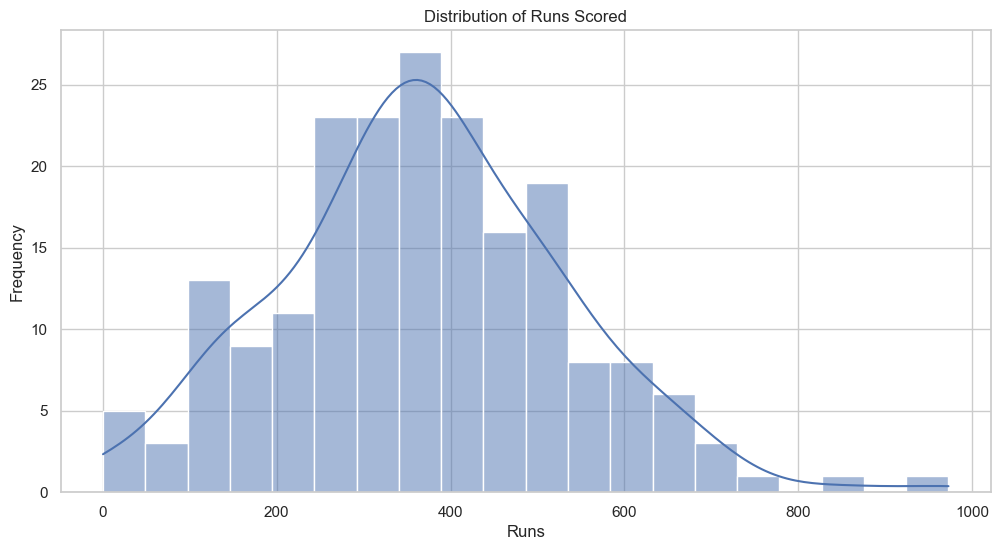

In [40]:
# Plot distribution of runs scored by players
plt.figure(figsize=(12, 6))
sns.histplot(ipl['Runs'], bins=20, kde=True)
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

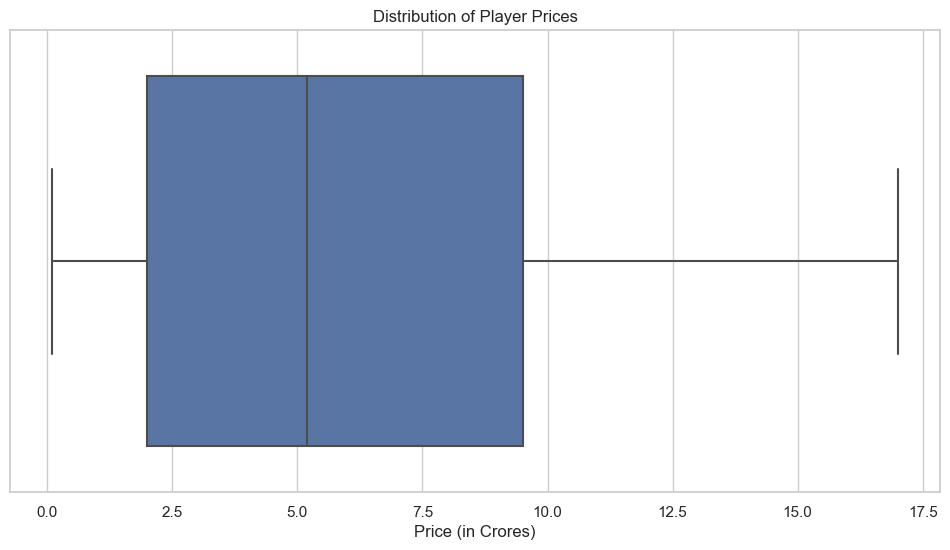

In [41]:
ipl['Price'] = ipl['Price'].str.replace('INR|,|\s', '', regex=True)
ipl['Price'] = ipl['Price'].str.extract(r'(\d+\.?\d*)').astype(float)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price', data=ipl)
plt.title('Distribution of Player Prices')
plt.xlabel('Price (in Crores)')
plt.show()

In [42]:

# Grouping by player
player_stats = ipl.groupby('Player').agg({
    'Runs': ['sum', 'mean', 'median'],
    'Teams': lambda x: ', '.join(x.unique()),
    'Price': 'mean',
    'Mat': 'sum'
}).reset_index()

# Rename columns for better interpretation
player_stats.columns = ['Player', 'Total Runs', 'Mean Runs', 'Median Runs', 'Teams Played', 'Mean Salary', 'Total Matches']

# Sort players by total runs
player_stats = player_stats.sort_values(by='Total Runs', ascending=False)

# Display the performance metrics for each player separately
print(player_stats)


             Player  Total Runs   Mean Runs  Median Runs  \
13         V Kohli         7281  455.062500        434.5   
11        S Dhawan         6617  413.562500        430.0   
4        DA Warner         6397  456.928571        474.0   
9         RG Sharma        6211  388.187500        385.5   
12        SK Raina         5528  394.857143        436.0   
0   AB de Villiers         5162  368.714286        377.5   
8         MS Dhoni         5082  317.625000        345.0   
3         CH Gayle         4965  381.923077        292.0   
10       RV Uthappa        4952  330.133333        351.0   
6        KD Karthik        4516  282.250000        280.0   
1        AM Rahane         4400  293.333333        339.0   
2        AT Rayudu         4330  309.285714        307.5   
5        G Gambhir         4217  383.363636        378.0   
7         KL Rahul         4163  416.300000        495.0   

                 Teams Played  Mean Salary  Total Matches  
13                        RCB     1.093

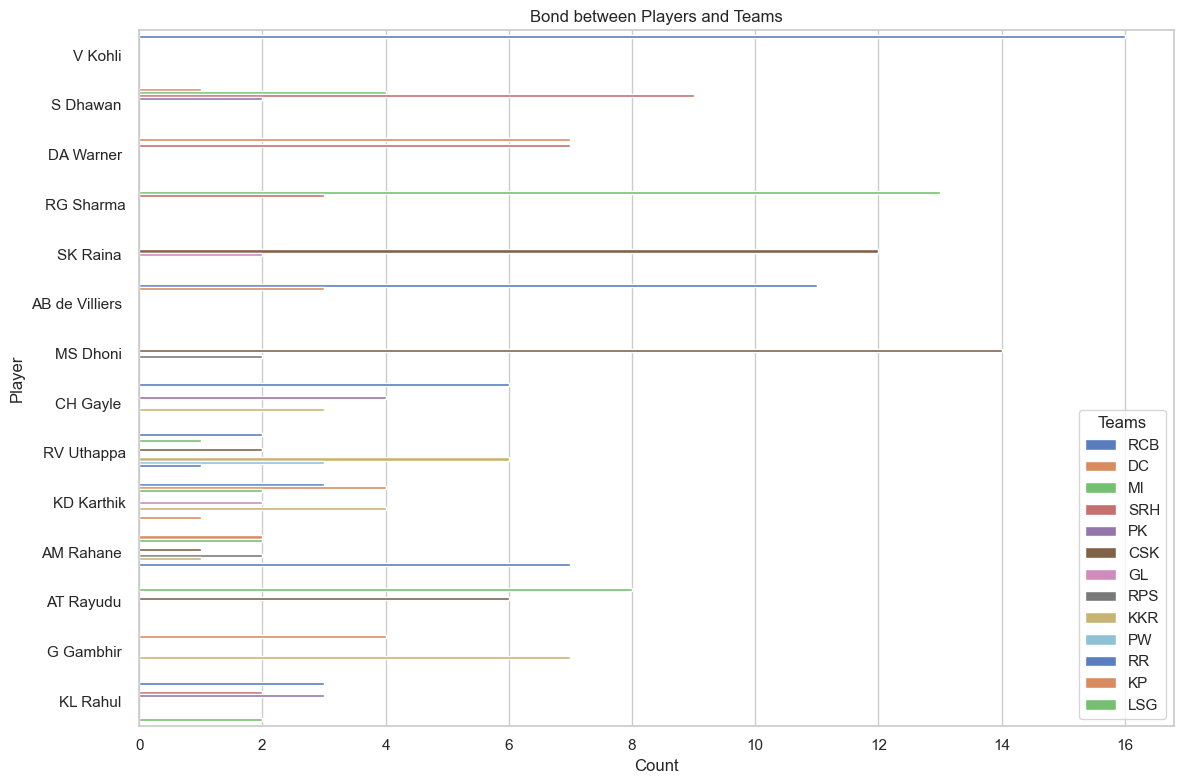

In [43]:
# Set the style of the plot
sns.set(style="whitegrid")

# Plotting the bond between player and each team they have been a part of using a count plot
plt.figure(figsize=(12, 8))
sns.countplot(y='Player', hue='Teams', data=ipl, palette='muted')

# Customize the plot
plt.title('Bond between Players and Teams')
plt.xlabel('Count')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

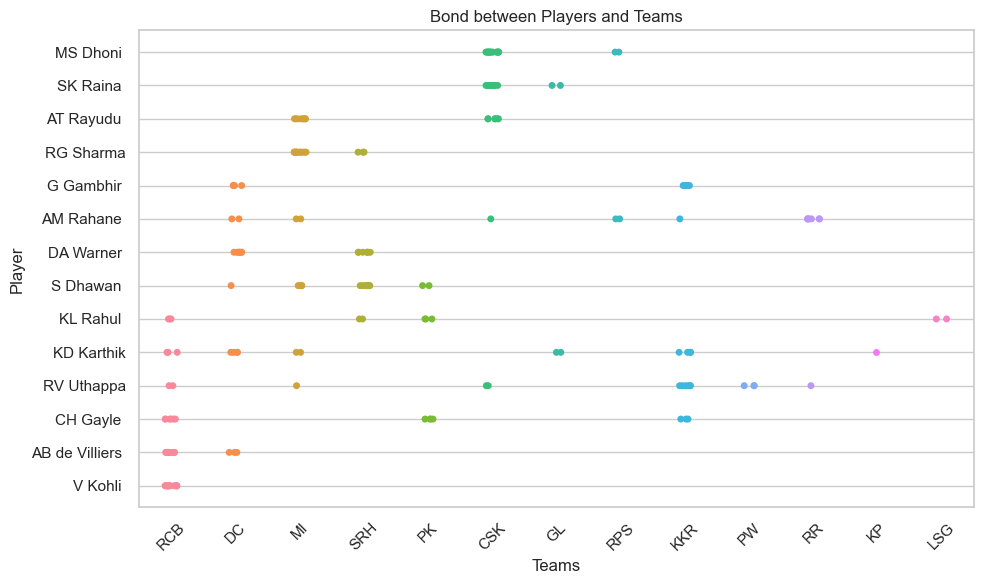

In [46]:

# Plotting the bond between player and each team they have been a part of
plt.figure(figsize=(10, 6))
sns.stripplot(x='Teams', y='Player', data=ipl, jitter=True)
plt.title('Bond between Players and Teams')
plt.xlabel('Teams')
plt.ylabel('Player')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

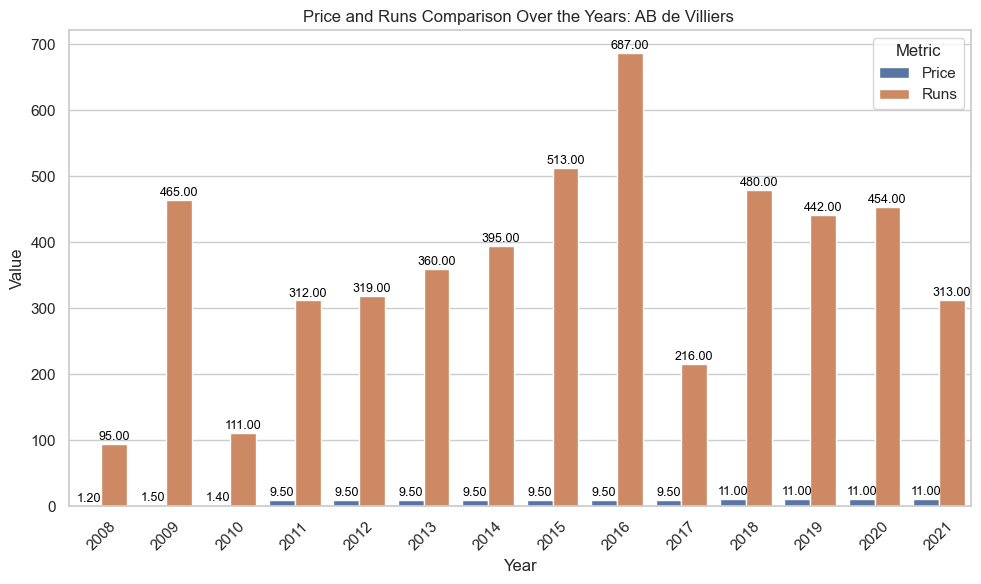

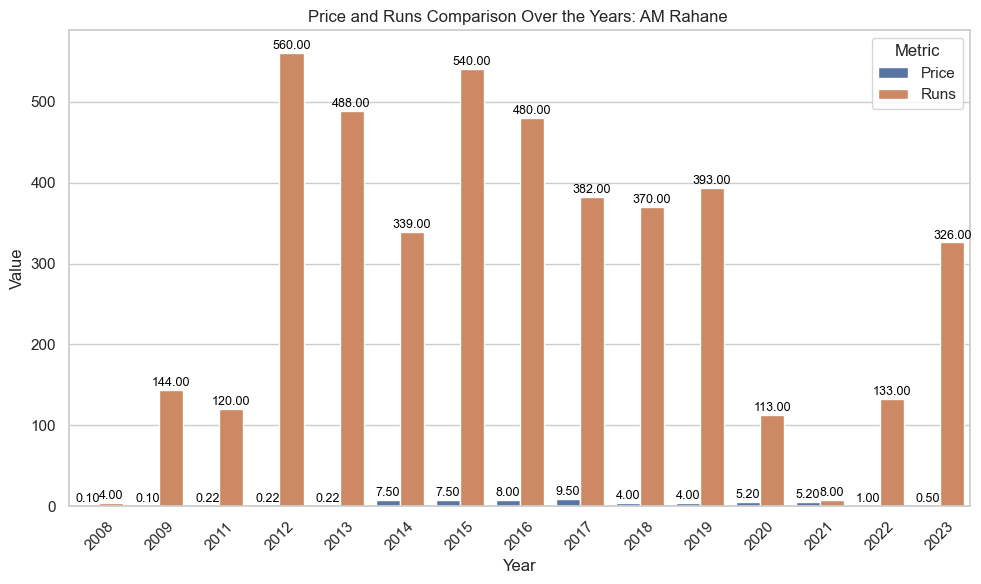

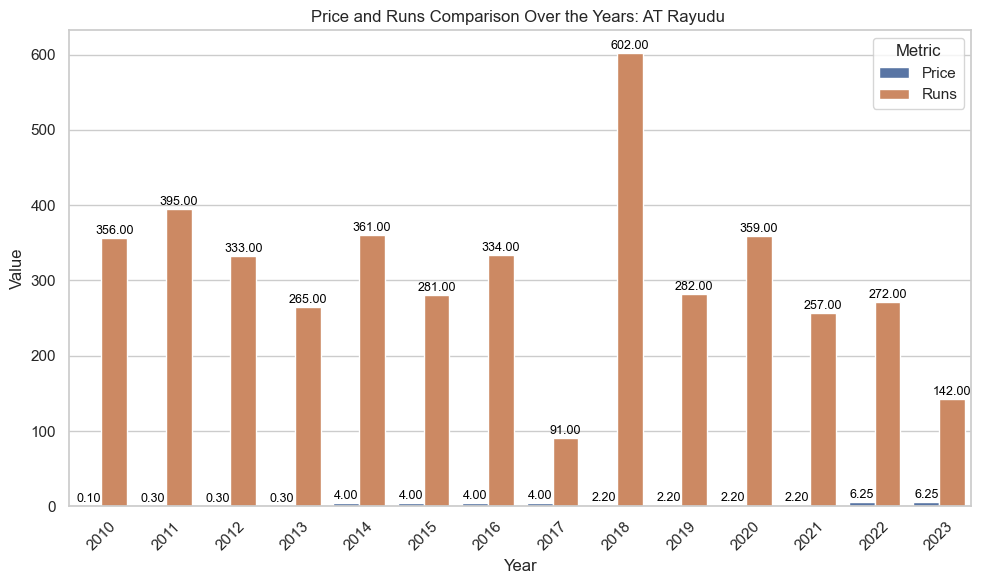

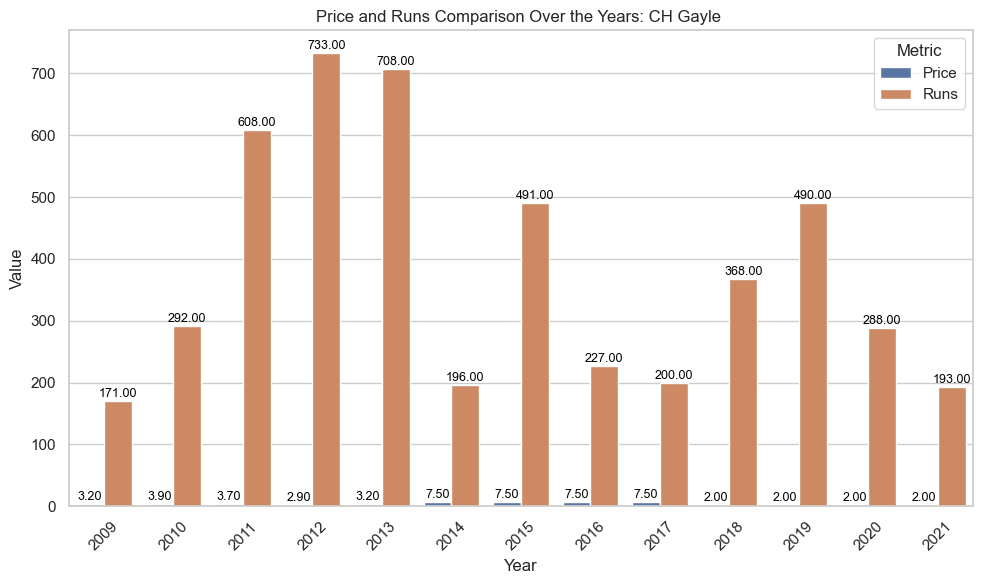

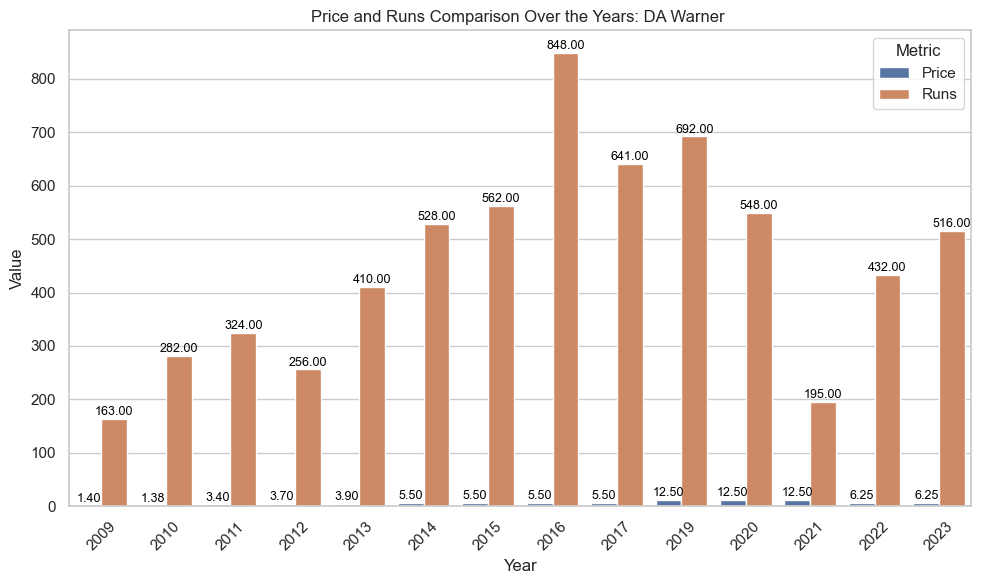

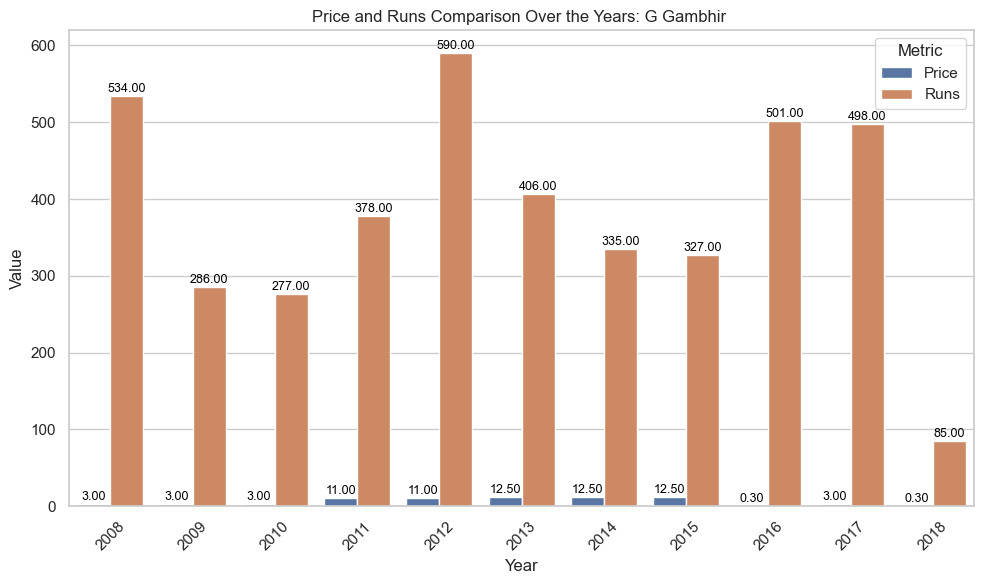

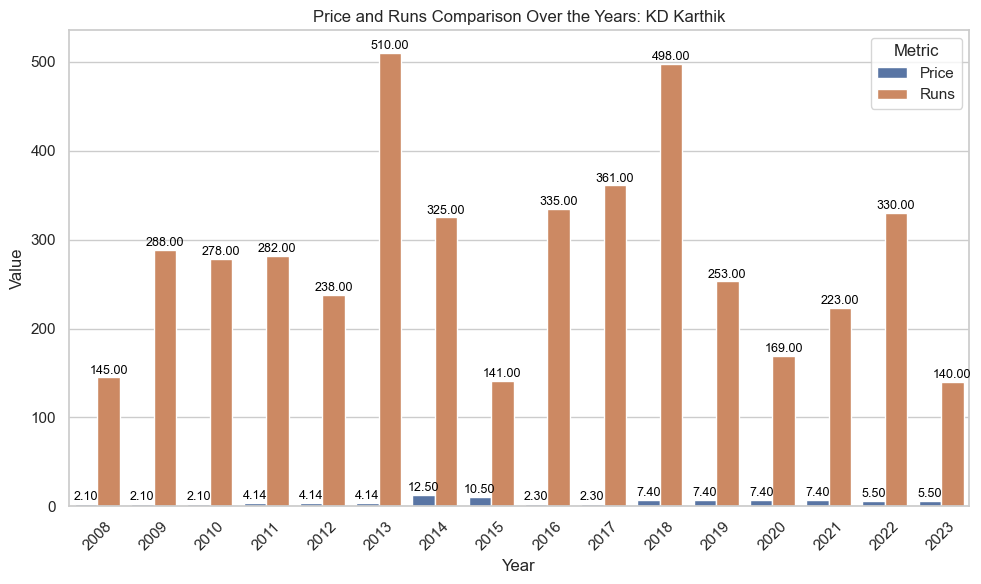

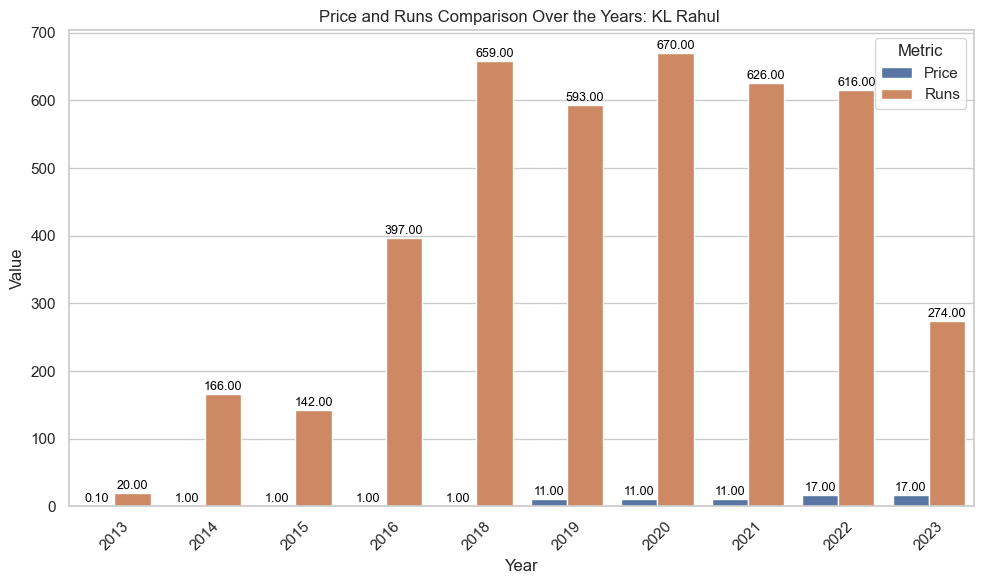

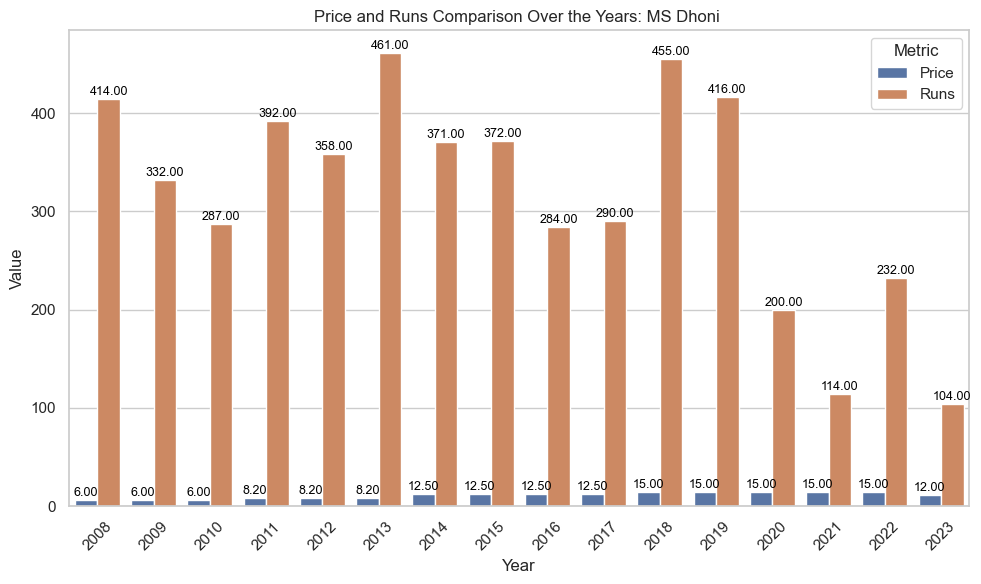

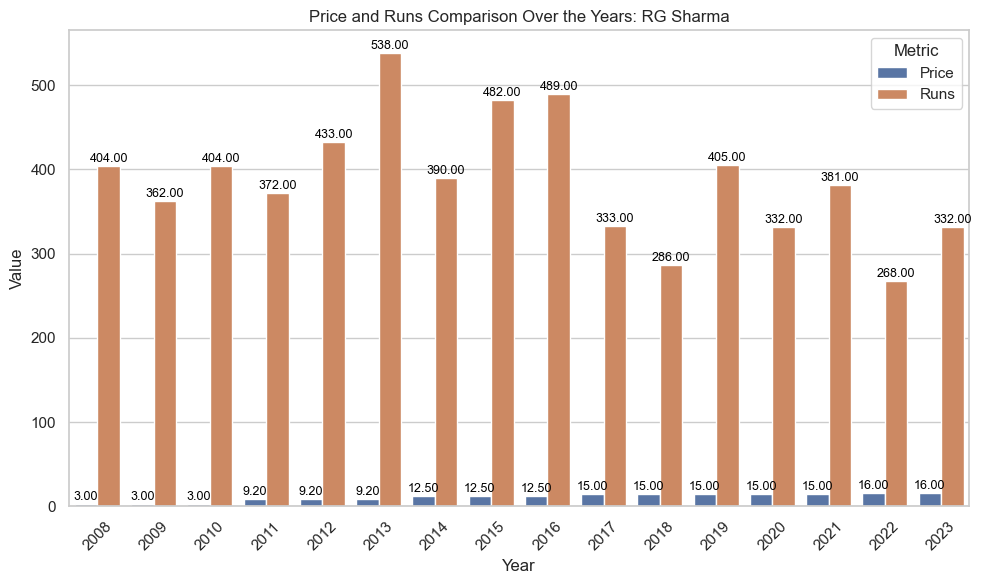

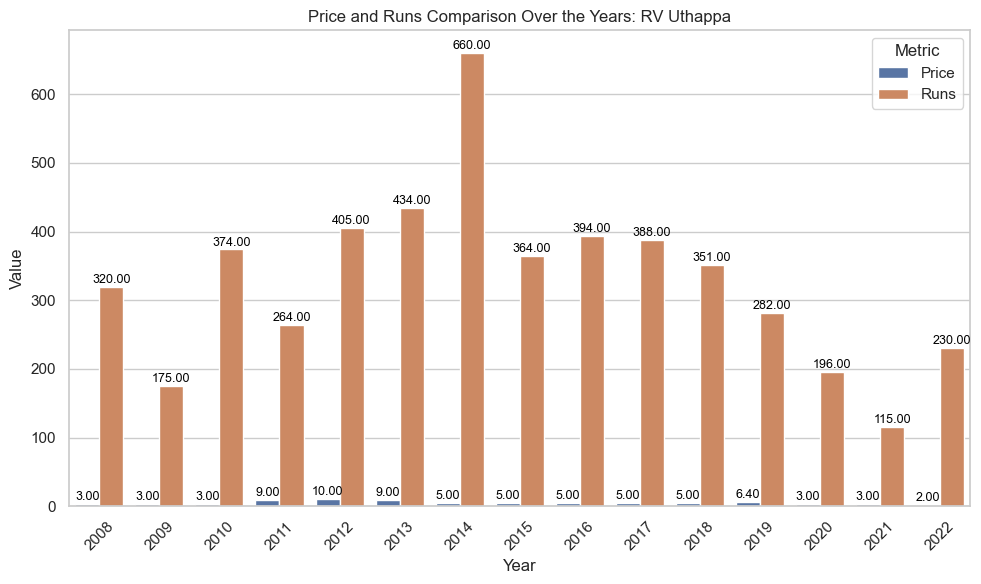

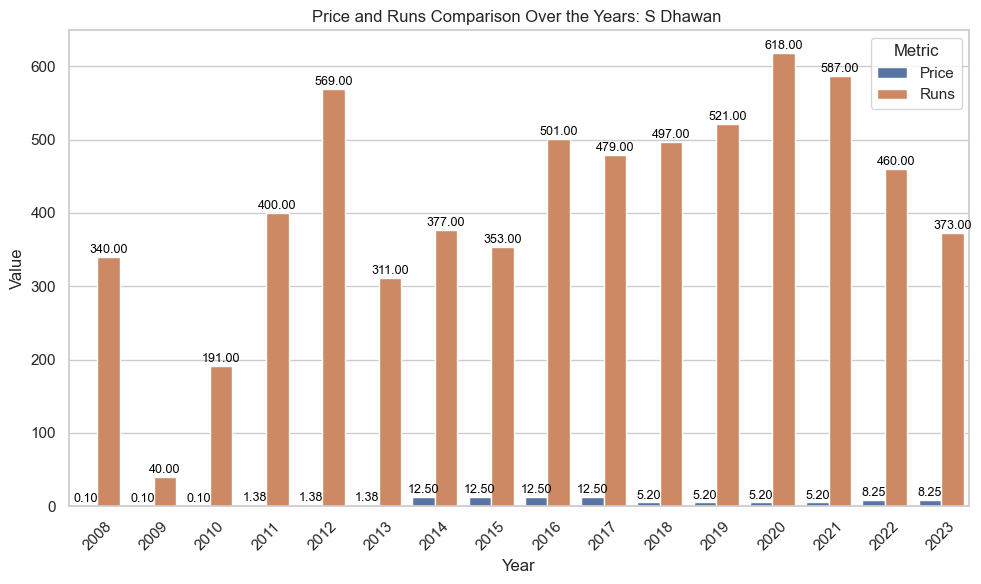

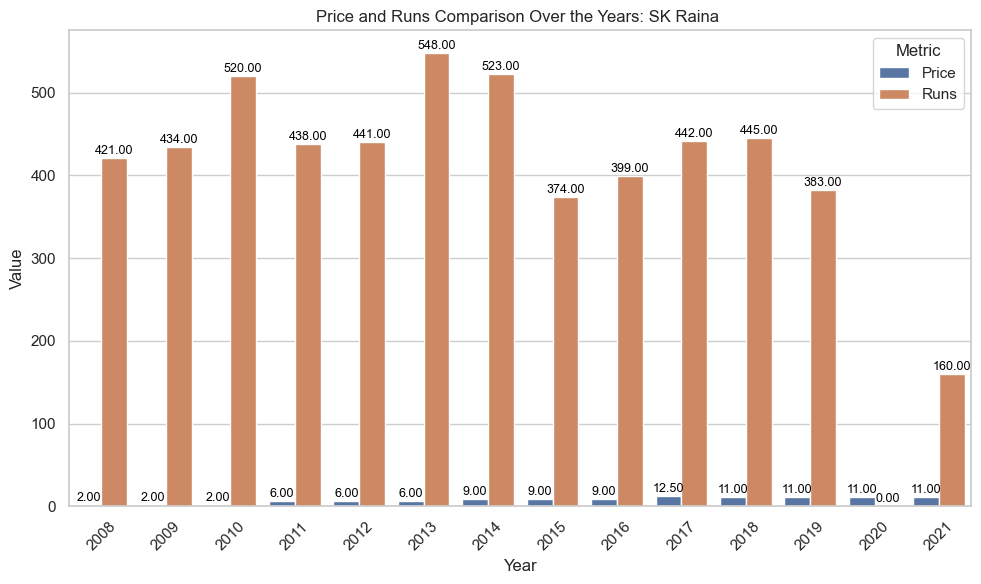

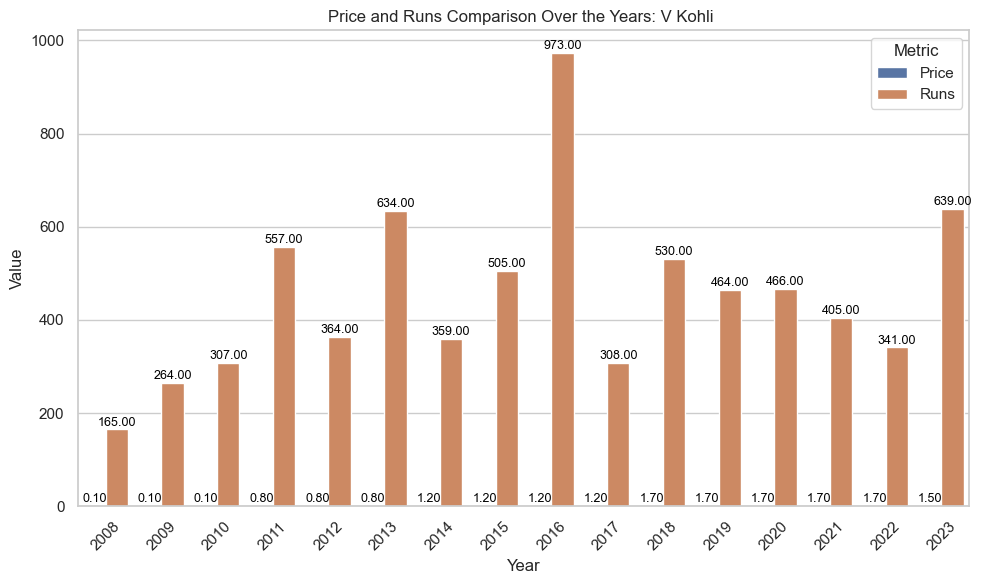

In [48]:
# Iterate over each player
for player, player_data in ipl.groupby('Player'):
    # Create a new figure for each player
    plt.figure(figsize=(10, 6))

    # Melt the dataframe to have 'year' as a column
    melted_data = player_data.melt(id_vars=['year'], value_vars=['Price', 'Runs'], var_name='Metric', value_name='Value')

    # Plot bar graph
    ax = sns.barplot(x='year', y='Value', hue='Metric', data=melted_data)

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Set the title and labels
    plt.title(f'Price and Runs Comparison Over the Years: {player}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.xticks(rotation=45)

    # Show legend
    plt.legend(title='Metric')

    # Show the plot
    plt.tight_layout()
    plt.show()


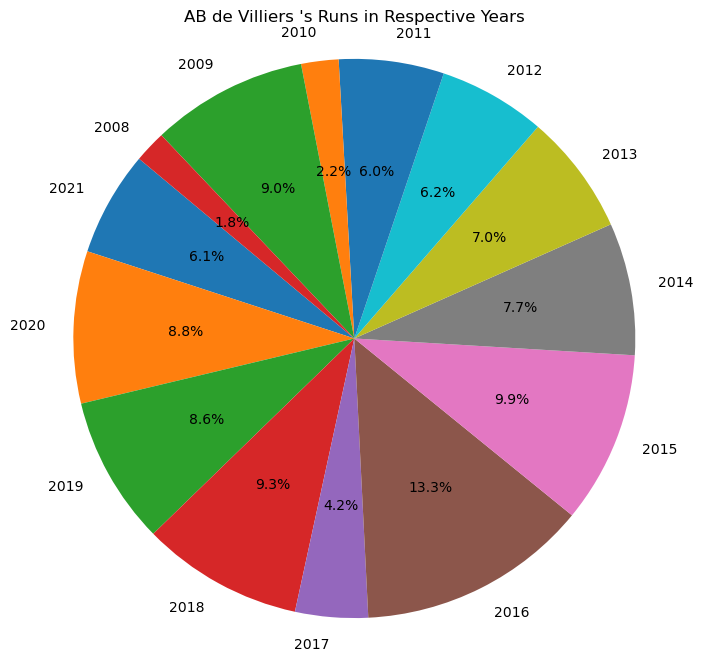

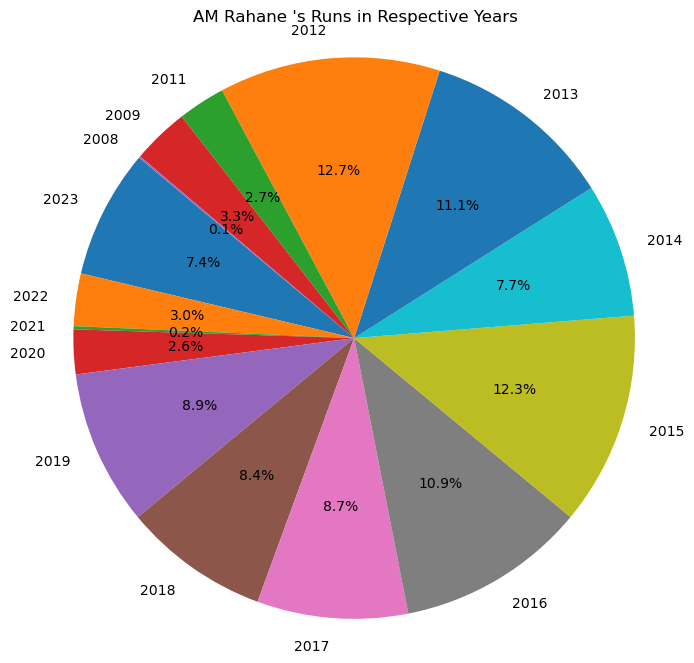

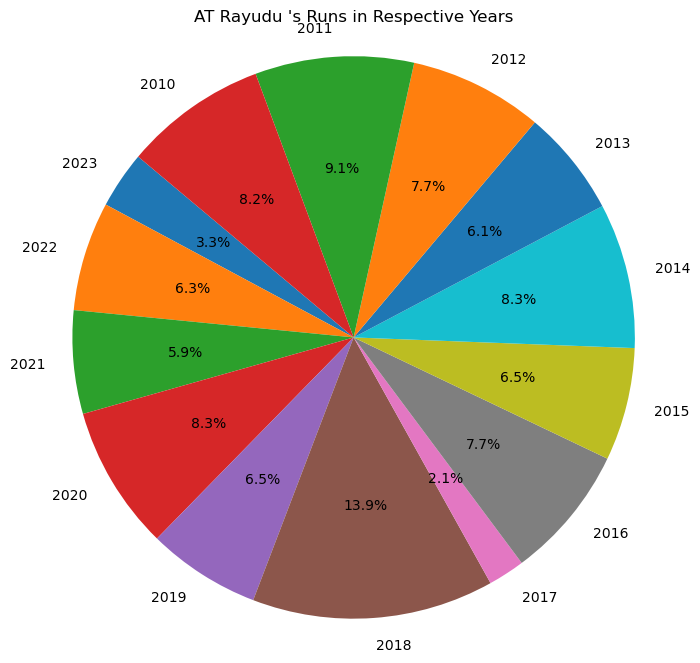

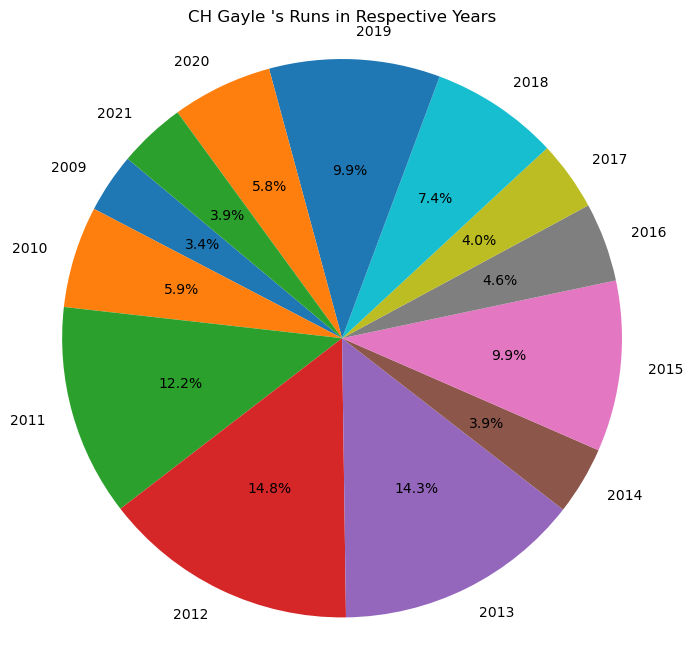

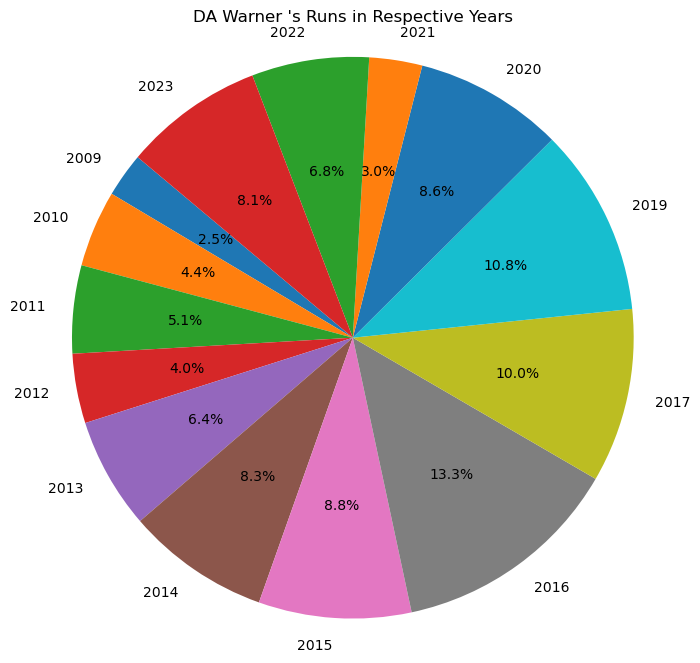

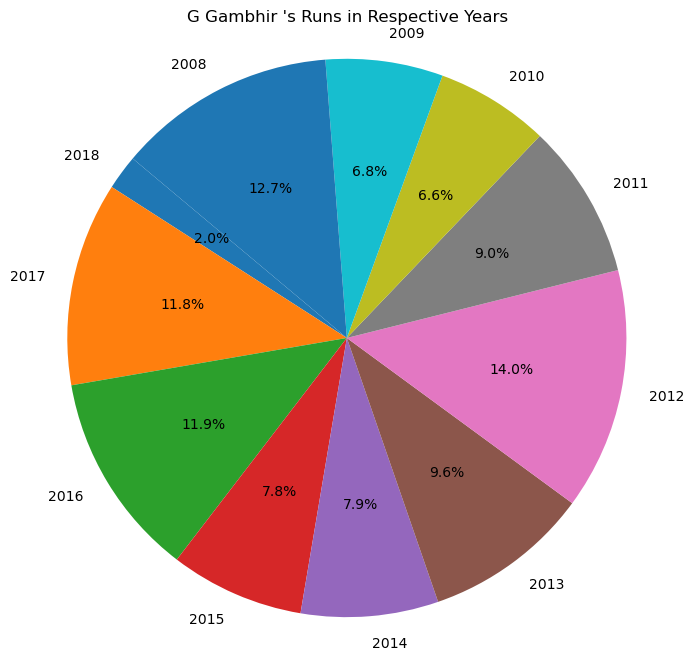

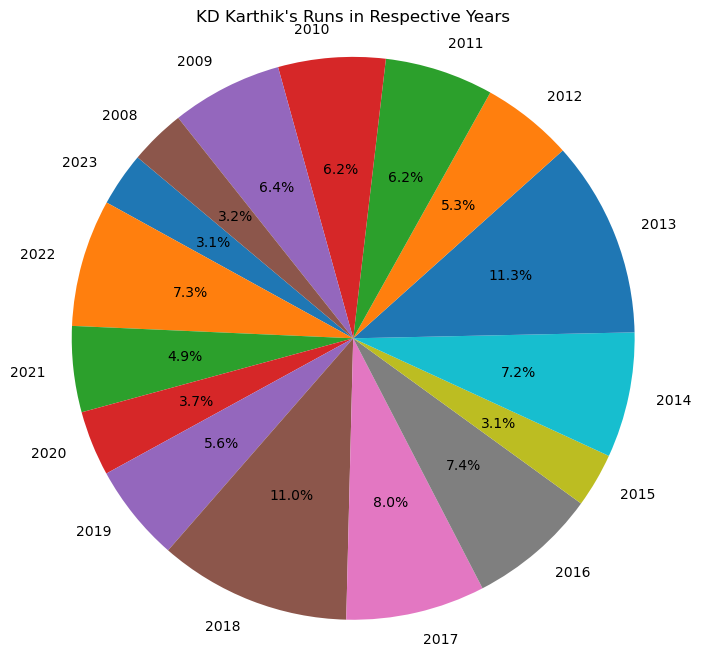

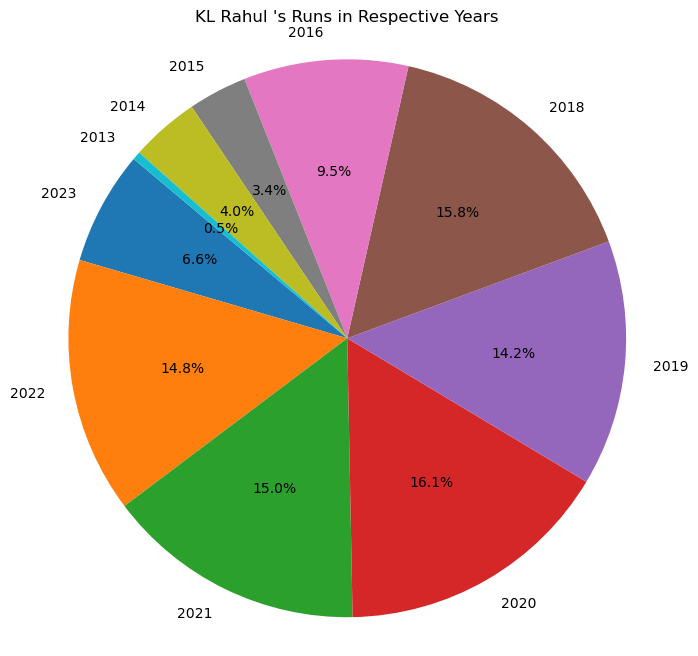

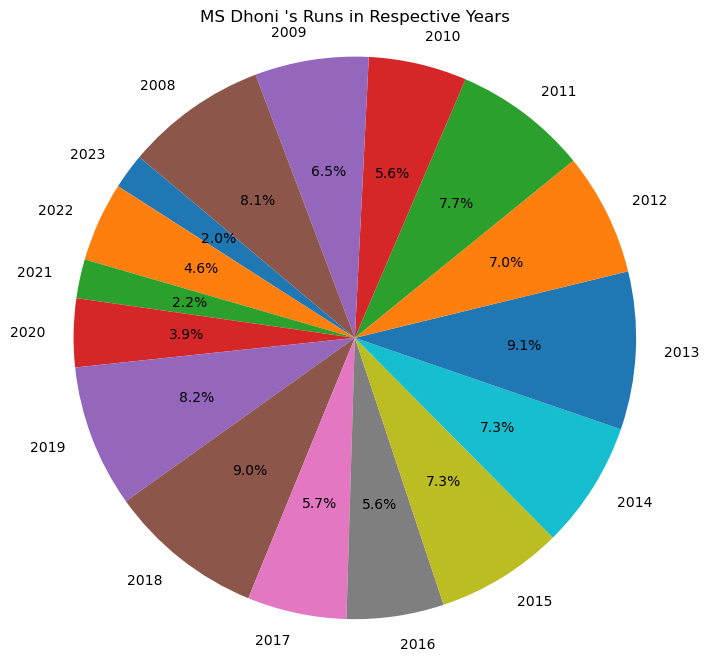

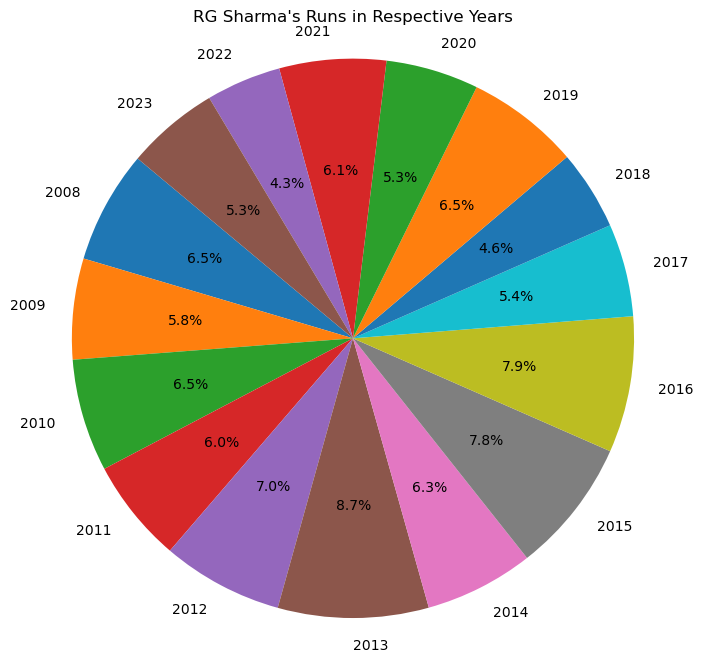

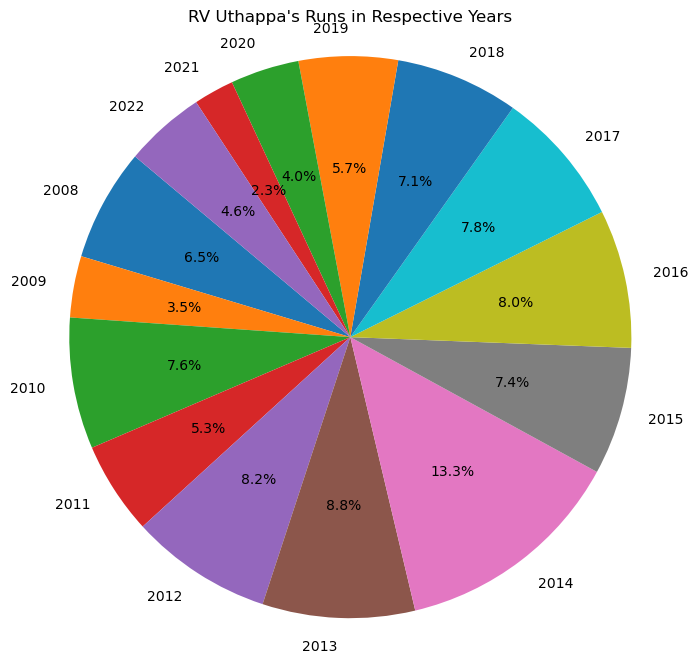

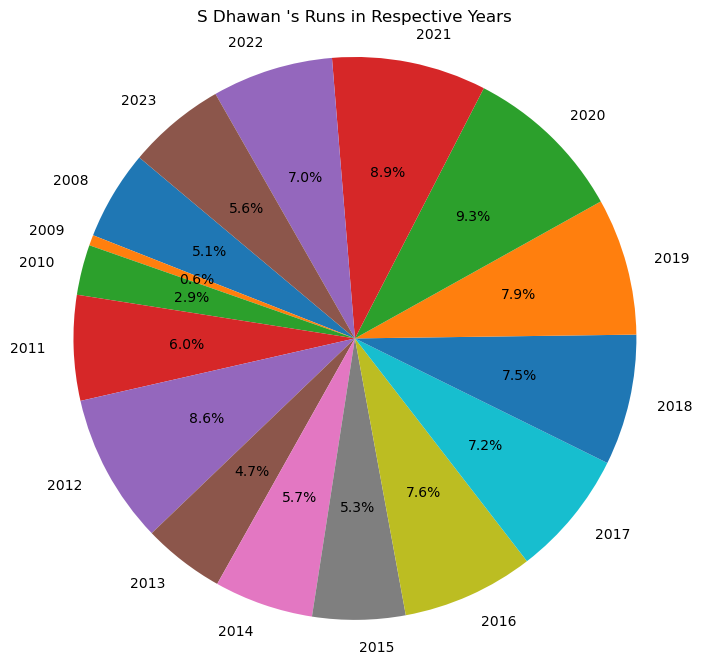

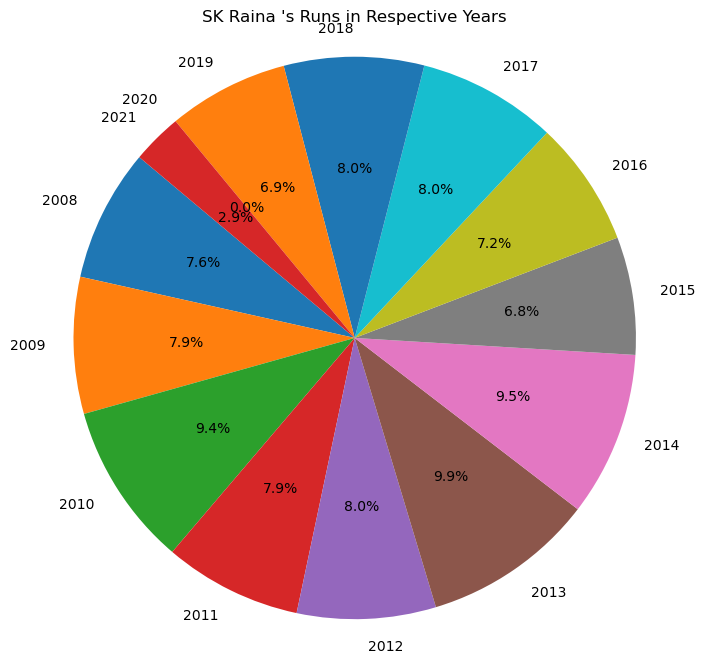

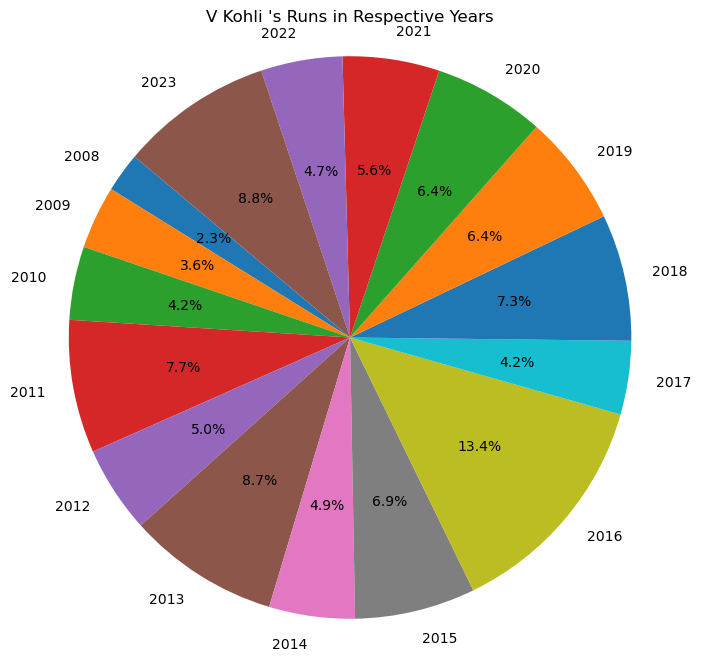

In [4]:
# Group the data by player
grouped_data = ipl.groupby('Player')

# Plot pie charts for each player
for player, data in grouped_data:
    plt.figure(figsize=(8, 8))
    plt.pie(data['Runs'], labels=data['year'], autopct='%1.1f%%', startangle=140)
    plt.title(f"{player}'s Runs in Respective Years")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [5]:
# Group the data by player and team
grouped_data = ipl.groupby(['Player', 'Teams'])

# Initialize an empty dictionary to store loyalty index
loyalty_index = {}

# Calculate loyalty index for each player
for (player, team), data in grouped_data:
    seasons_played = len(data['year'].unique())
    if player in loyalty_index:
        loyalty_index[player][team] = seasons_played
    else:
        loyalty_index[player] = {team: seasons_played}

# Print loyalty index for each player
for player, teams in loyalty_index.items():
    print(f"{player}:")
    for team, seasons_played in teams.items():
        print(f"   {team}: {seasons_played} seasons")
    print()

AB de Villiers :
   DC: 3 seasons
   RCB: 11 seasons

AM Rahane :
   CSK: 1 seasons
   DC: 2 seasons
   KKR: 1 seasons
   MI: 2 seasons
   RPS: 2 seasons
   RR: 7 seasons

AT Rayudu :
   CSK: 6 seasons
   MI: 8 seasons

CH Gayle :
   KKR: 3 seasons
   PK: 4 seasons
   RCB: 6 seasons

DA Warner :
   DC: 7 seasons
   SRH: 7 seasons

G Gambhir :
   DC: 4 seasons
   KKR: 7 seasons

KD Karthik:
   DC: 4 seasons
   GL: 2 seasons
   KKR: 4 seasons
   KP: 1 seasons
   MI: 2 seasons
   RCB: 3 seasons

KL Rahul :
   LSG: 2 seasons
   PK: 3 seasons
   RCB: 3 seasons
   SRH: 2 seasons

MS Dhoni :
   CSK: 14 seasons
   RPS: 2 seasons

RG Sharma:
   MI: 13 seasons
   SRH: 3 seasons

RV Uthappa:
   CSK: 2 seasons
   KKR: 6 seasons
   MI: 1 seasons
   PW: 3 seasons
   RCB: 2 seasons
   RR: 1 seasons

S Dhawan :
   DC: 1 seasons
   MI: 4 seasons
   PK: 2 seasons
   SRH: 9 seasons

SK Raina :
   CSK: 12 seasons
   GL: 2 seasons

V Kohli :
   RCB: 16 seasons



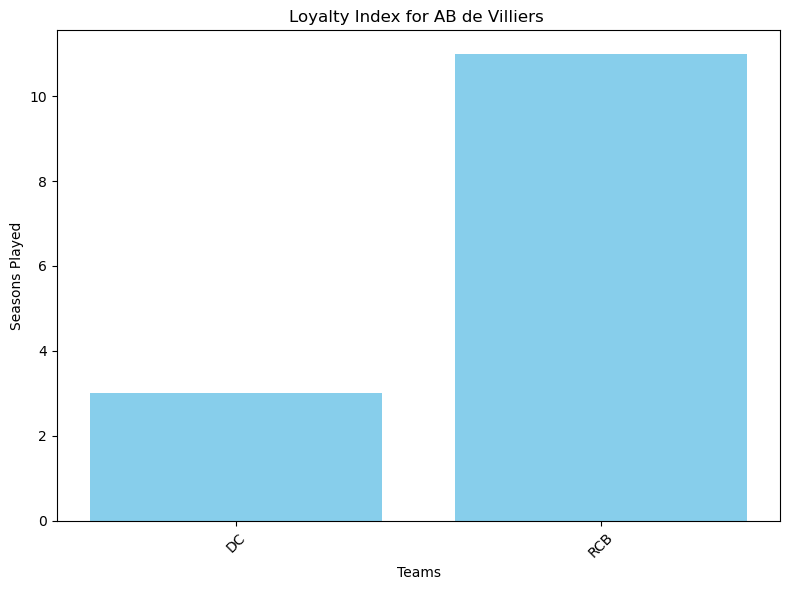

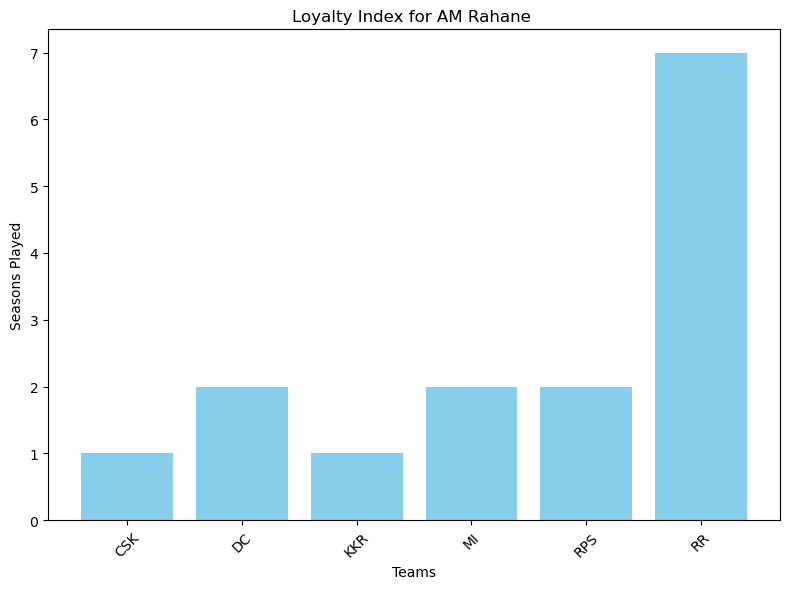

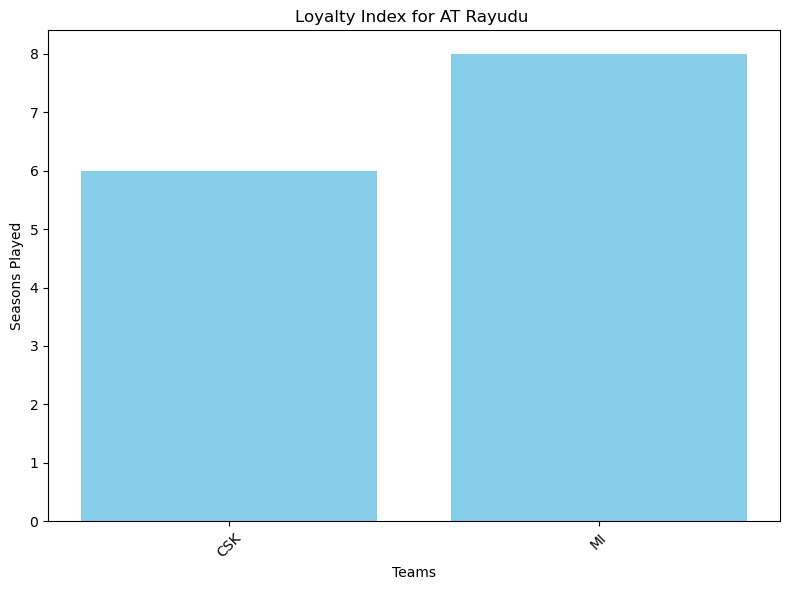

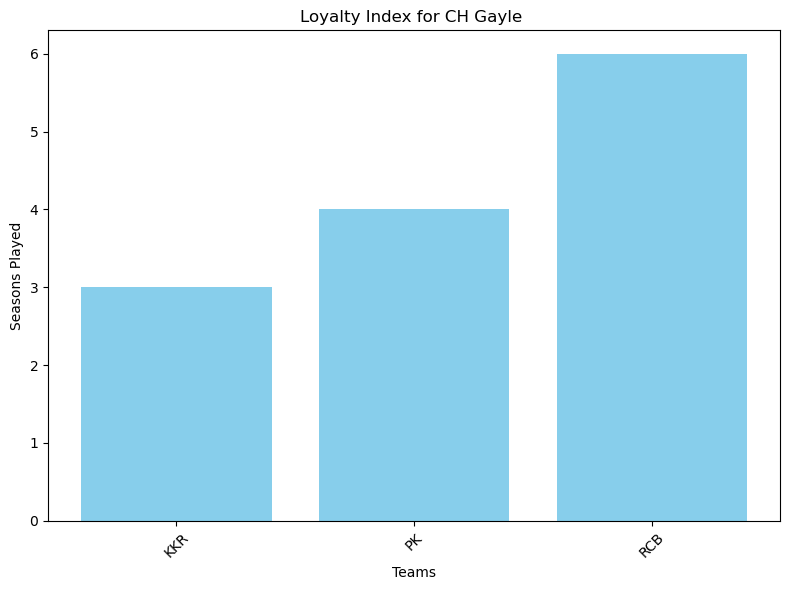

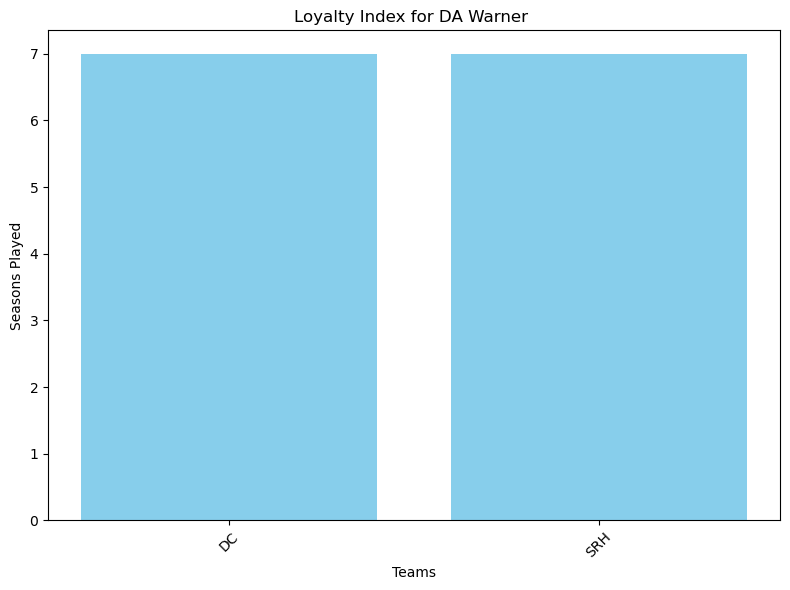

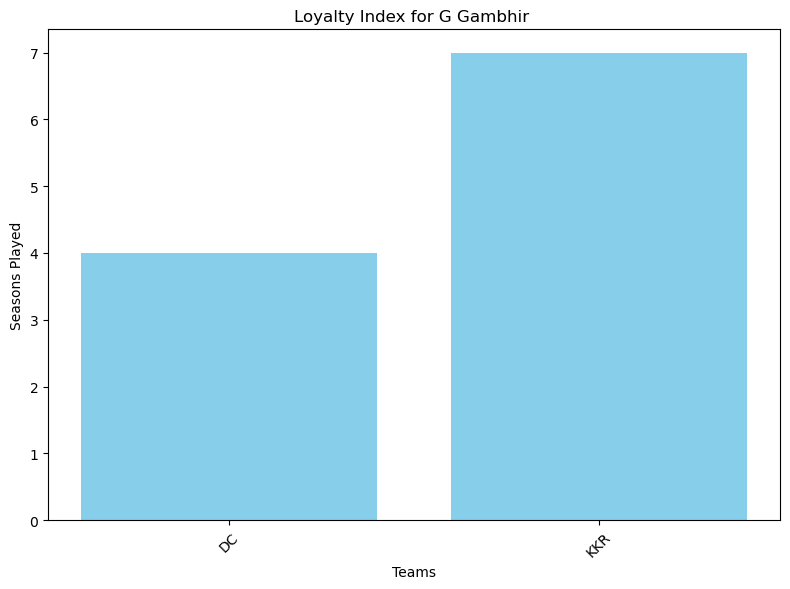

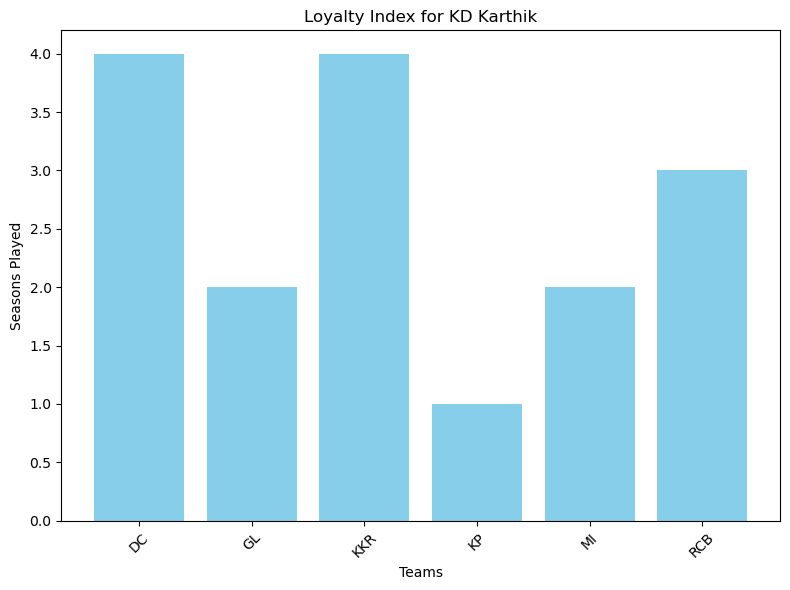

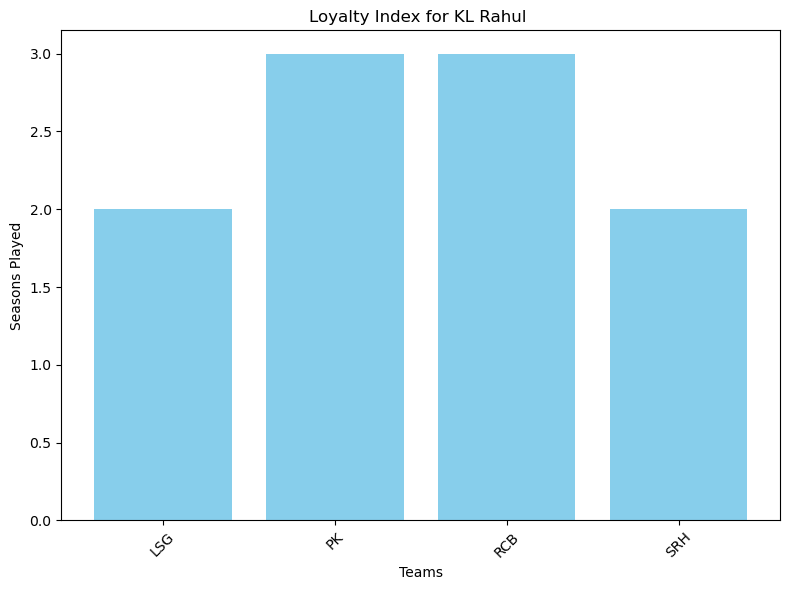

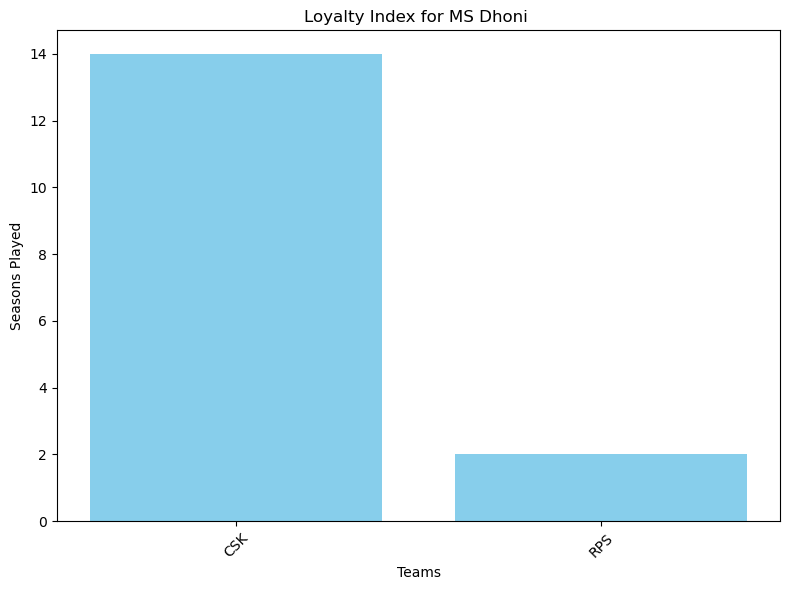

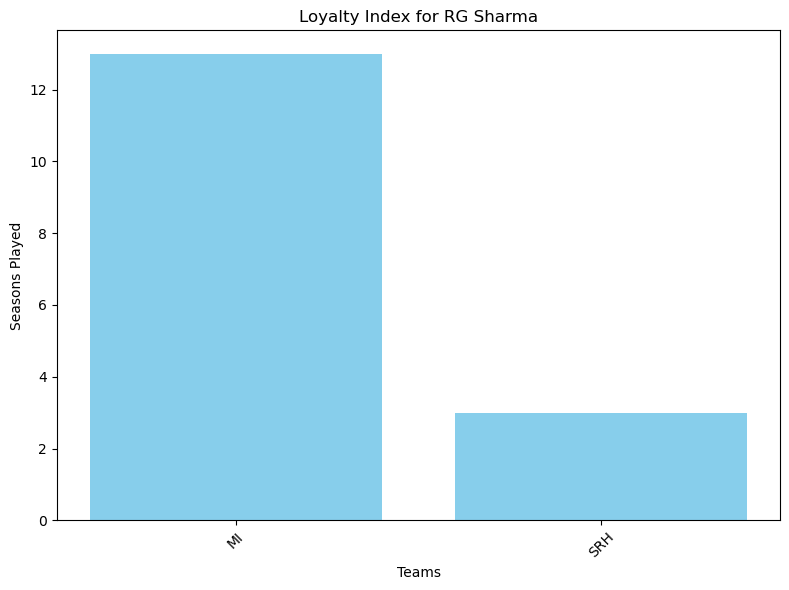

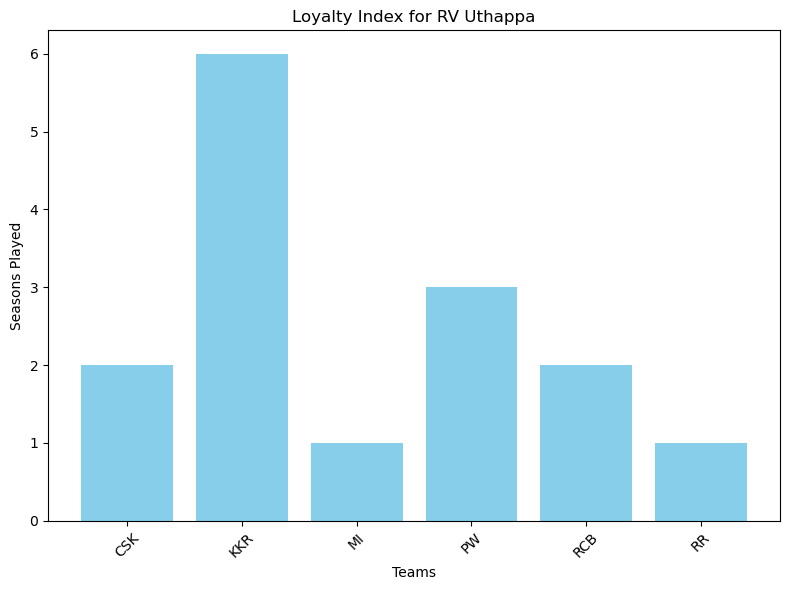

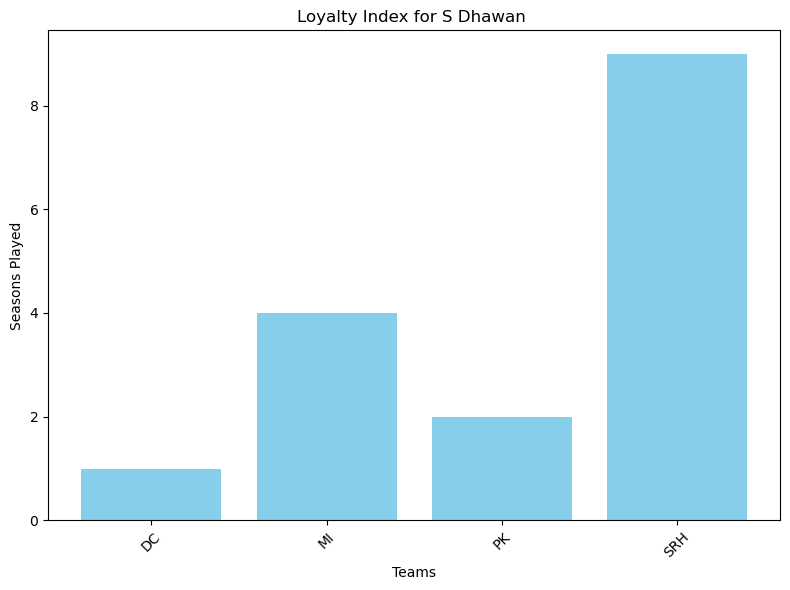

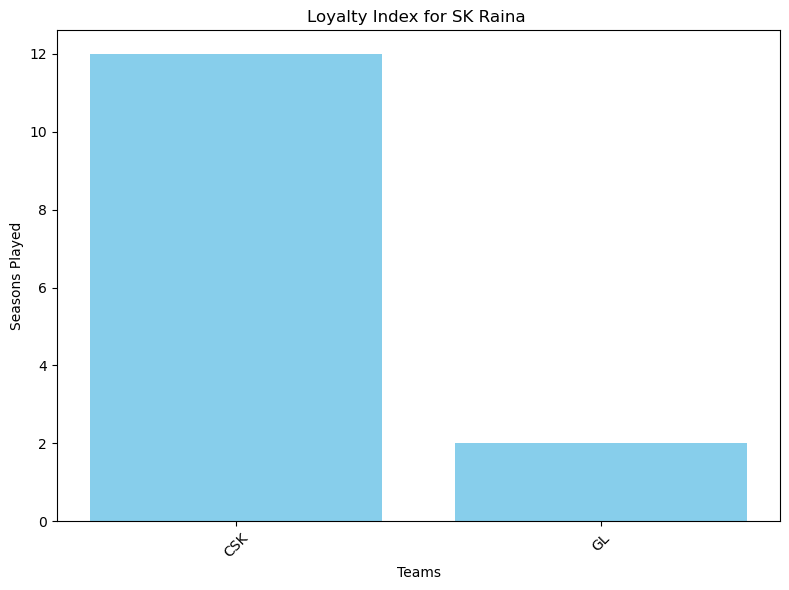

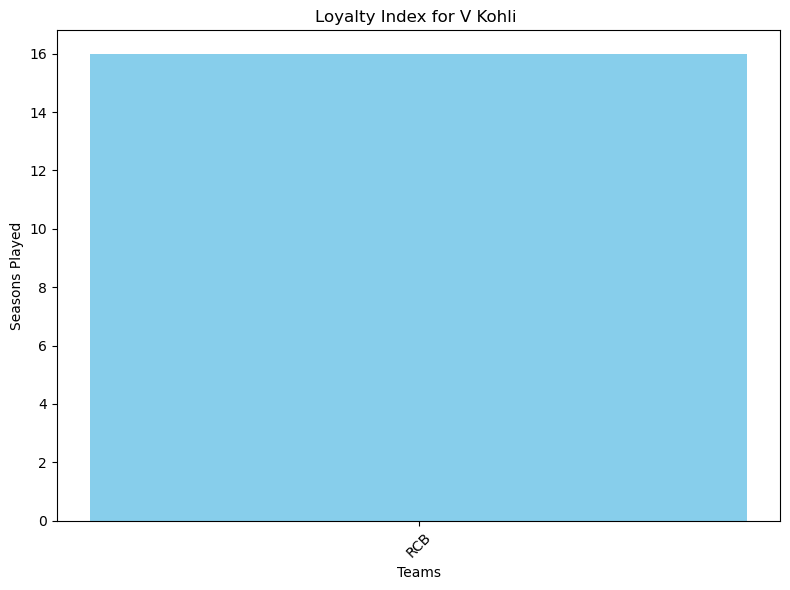

In [6]:
# Plot bar graphs for each player
for player, teams_played in loyalty_index.items():
    teams = list(teams_played.keys())
    seasons_played = list(teams_played.values())

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(teams, seasons_played, color='skyblue')
    ax.set_xlabel('Teams')
    ax.set_ylabel('Seasons Played')
    ax.set_title(f'Loyalty Index for {player}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

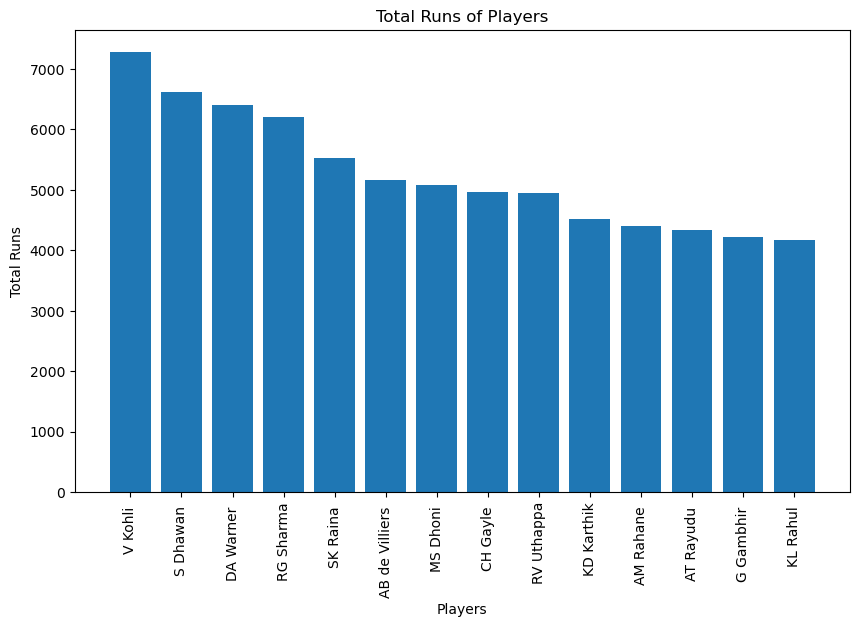

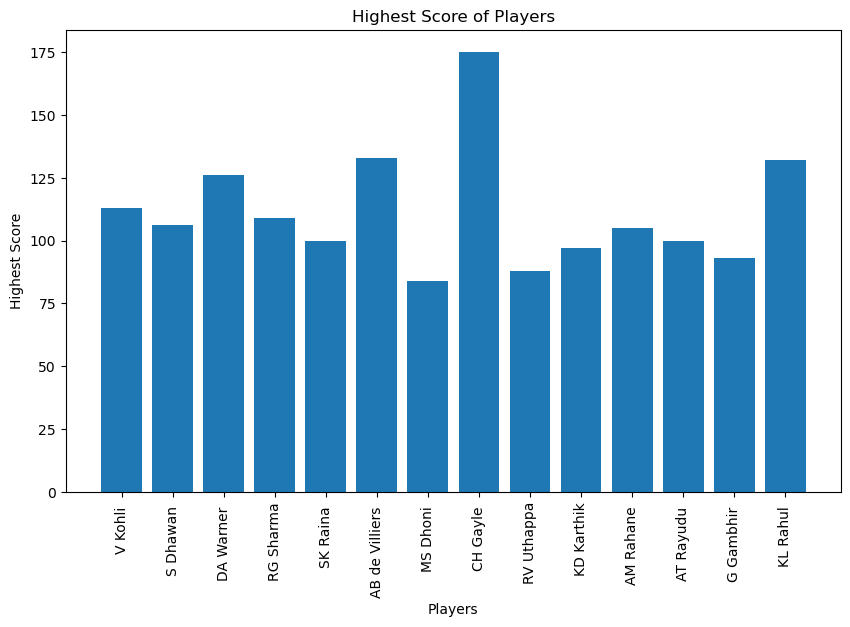

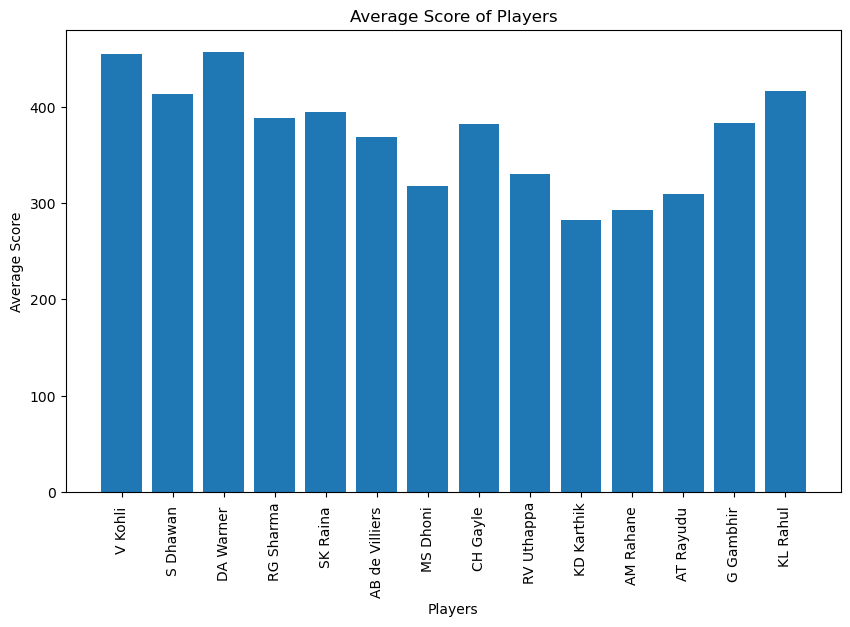

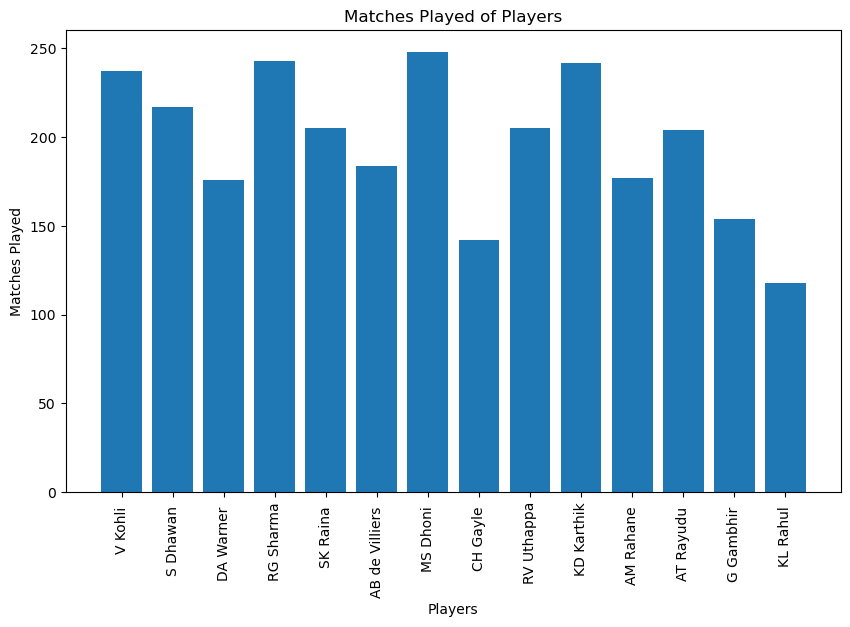

In [7]:
def calculate_performance(player_name):
    player_data = ipl[ipl['Player'] == player_name]
    total_runs = player_data['Runs'].sum()
    highest_score = player_data['HS'].max()
    average_score = player_data['Runs'].mean()
    matches_played = player_data['Mat'].sum()
    performance = {
        'Total Runs': total_runs,
        'Highest Score': highest_score,
        'Average Score': average_score,
        'Matches Played': matches_played,
    }
    return performance

# Calculate performance matrix for all players
performance_metrics = {}
for player in ipl['Player'].unique():
    performance_metrics[player] = calculate_performance(player)

# Create bar charts for each performance metric
metrics = list(performance_metrics.values())[0].keys()  # Get the list of metrics
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(performance_metrics.keys(), [metrics[metric] for metrics in performance_metrics.values()])
    plt.title(f'{metric} of Players')
    plt.xlabel('Players')
    plt.ylabel(metric)
    plt.xticks(rotation=90)
    plt.show()